In [1]:
from utilities.plot_utils import *
def learn(agent):
    agent.train(1000)
    plot_episode_rewards(agent.episode_rewards, 'Pendulum: Episode Rewards - Training')
    plt.show()
    plot_actor_critic_losses(agent.actor_losses, agent.critic_losses)
    plt.show()
    agent.save_model_weights("pendulum", "td3")

def test(agent):
    agent.test(10)
    plot_episode_rewards(agent.test_rewards, 'Pendulum: Episode Rewards - Testing')
    plt.show()
    # agent.save_plot_data("highway", "ddpg", "test_rewards", agent.test_rewards)

def visualize(agent, env):
    agent.change_environment(env)
    agent.visualize(3)

Action Count: 1, Max Action: 2.0, Min Action: -2.0
State Shape: 3


c:\Users\seanc\miniconda3\envs\rl\Lib\site-packages\gymnasium\utils\passive_env_checker.py:275: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'torch.Tensor'>
  logger.warn(


Episode 0 reward: -1190.39
Episode 10 reward: -1319.83
Episode 20 reward: -1432.87
Episode 30 reward: -1400.39
Episode 40 reward: -1305.04
Episode 50 reward: -1763.5
Episode 60 reward: -1348.34
Episode 70 reward: -1296.59
Episode 80 reward: -1839.95
Episode 90 reward: -1439.1
Episode 100 reward: -1600.38
Episode 110 reward: -1363.56
Episode 120 reward: -1521.29
Episode 130 reward: -1388.48
Episode 140 reward: -993.58
Episode 150 reward: -1074.89
Episode 160 reward: -1058.08
Episode 170 reward: -906.27
Episode 180 reward: -1082.25
Episode 190 reward: -1271.92
Episode 200 reward: -1279.89
Episode 210 reward: -1011.74
Episode 220 reward: -1337.55
Episode 230 reward: -855.25
Episode 240 reward: -1409.27
Episode 250 reward: -998.15
Episode 260 reward: -1442.31
Episode 270 reward: -1672.49
Episode 280 reward: -1398.09
Episode 290 reward: -885.59
Episode 300 reward: -1606.6
Episode 310 reward: -892.46
Episode 320 reward: -1313.3
Episode 330 reward: -1267.79
Episode 340 reward: -1272.35
Episod

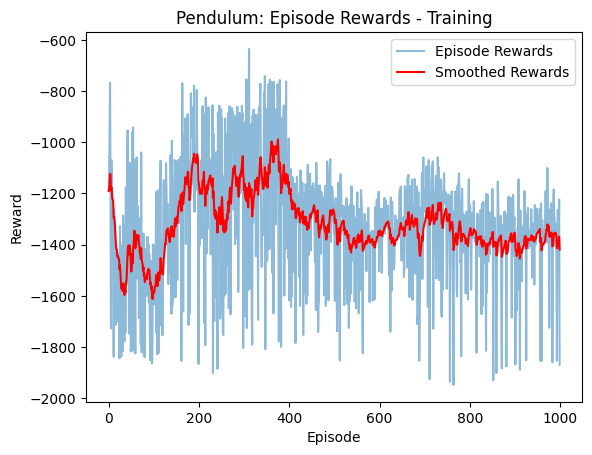

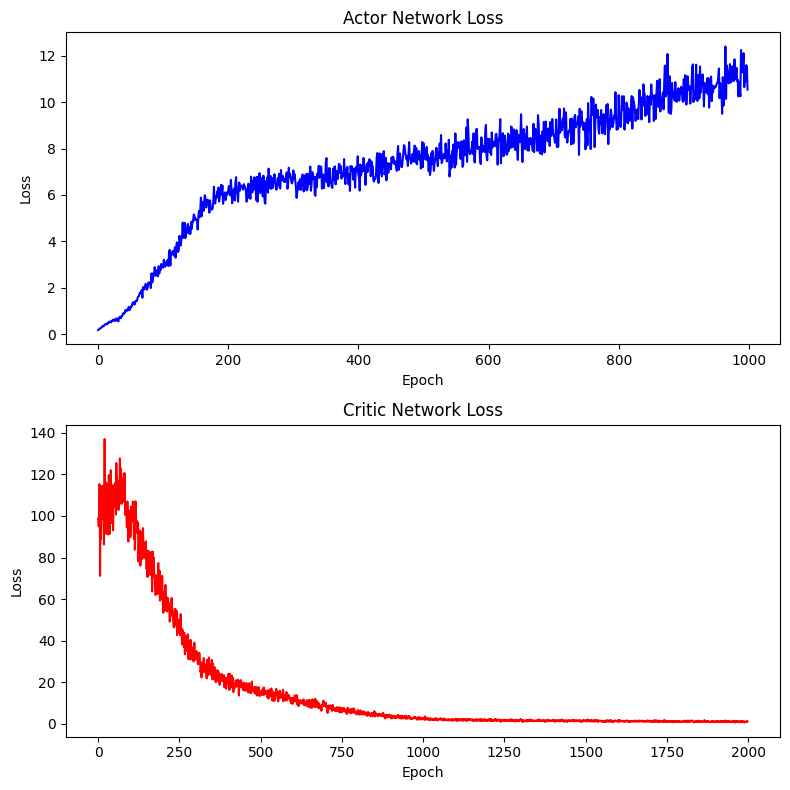

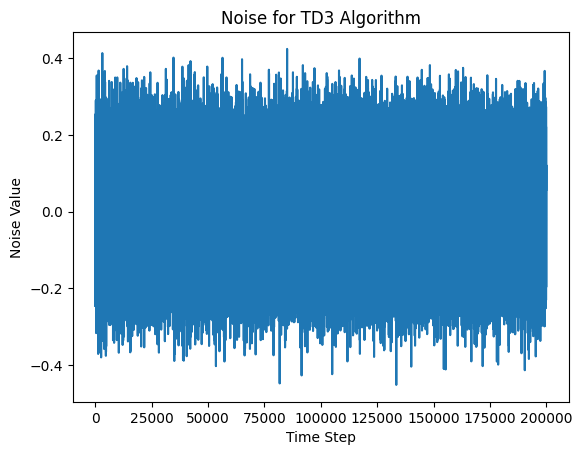

In [2]:
import gymnasium as gym
from td3.td3 import td3

params = {
    'gamma': 0.99,              # discount factor
    'alpha_critic': 0.0001,     # learning rate for critic net
    'alpha_actor': 0.001,      # learning rate for actor network
    'buffer_size': 100000,
    'batch_size' : 100,
    'tau':         0.001,
    'update_rate': 100,
    'noise_scale' : 0.1,
    "actor_update_frequency" : 2,
}

env = gym.make('Pendulum-v1', g=9.81)
agent = td3(env, params)

learn(agent)
plt.plot(agent.noise_arr)
plt.xlabel('Time Step')
plt.ylabel('Noise Value')
plt.title('Noise for TD3 Algorithm')
plt.show()

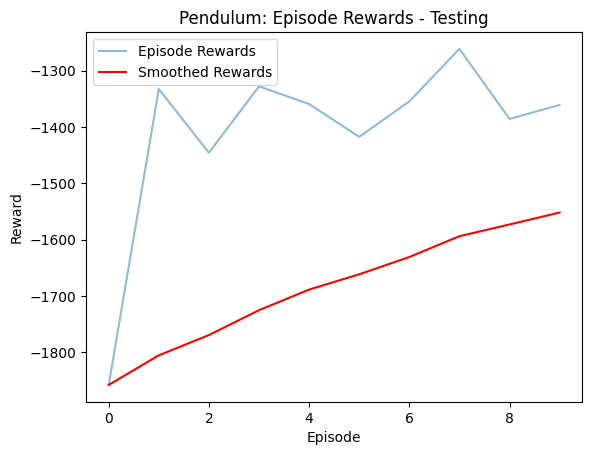

In [3]:
test(agent)

In [4]:
from utilities.plot_utils import *
# plot_data = load_plot_data("pendulum", "td3", "plot_data")
plot_dict = {
        "episode_rewards" : agent.episode_rewards,
        "actor_losses"    : agent.actor_losses,
        "critic_losses"   : agent.critic_losses,
        "test_rewards"    : agent.test_rewards
    }
save_plot_data("pendulum", "td3", "plot_data", plot_dict)

td3 Results saved to 'd:\Personal\Programs\DeepLearning\DL/pendulum/td3/pendulum_td3_plot_data.pkl'


In [5]:
env = gym.make('Pendulum-v1', render_mode='human')
visualize(agent, env)